[[0.00393614]
 [0.007299  ]
 [0.00104271]
 [0.014598  ]
 [0.0017549 ]
 [0.04491537]
 [0.00384754]
 [0.01661916]
 [0.00625629]
 [0.014598  ]
 [0.00056144]
 [0.01661916]
 [0.0022903 ]
 [0.04491537]
 [0.03885189]
 [0.02874611]
 [0.0042485 ]
 [0.053     ]
 [0.00144903]
 [0.00104271]
 [0.01255859]
 [0.03076726]
 [0.04390479]
 [0.03683074]
 [0.05198942]
 [0.00434187]
 [0.00950615]
 [0.03278842]
 [0.04491537]
 [0.00099077]
 [0.00164233]
 [0.00164014]
 [0.03480958]
 [0.00216172]
 [0.00715318]
 [0.01180818]
 [0.04390479]
 [0.033799  ]
 [0.00834171]
 [0.04087305]
 [0.0019168 ]
 [0.001999  ]
 [0.00010584]
 [0.00533985]
 [0.04996826]
 [0.014598  ]
 [0.02167205]
 [0.02268263]
 [0.03480958]
 [0.02672495]
 [0.00917291]
 [0.00393325]
 [0.00398882]
 [0.03480958]
 [0.00316312]
 [0.01661916]
 [0.00358524]
 [0.00834171]
 [0.04592595]
 [0.00403937]
 [0.00377052]
 [0.0026004 ]
 [0.0014811 ]
 [0.02773553]
 [0.00415571]
 [0.03177784]
 [0.00413438]
 [0.00358577]
 [0.00154728]
 [0.03480958]
 [0.01661916]
 [0.00

c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.499475 s

Training model...

0         [1.05e+00]    [8.54e-01]    []  
1000      [5.53e-04]    [7.57e-04]    []  
2000      [1.24e-04]    [2.41e-04]    []  
3000      [6.08e-05]    [1.28e-04]    []  
4000      [9.36e-05]    [1.16e-04]    []  
5000      [2.05e-05]    [6.43e-05]    []  
6000      [3.29e-05]    [7.26e-05]    []  
7000      [1.24e-05]    [5.55e-05]    []  
8000      [3.51e-05]    [6.72e-05]    []  
9000      [1.84e-05]    [5.64e-05]    []  
10000     [8.66e-06]    [4.73e-05]    []  
11000     [8.01e-06]    [4.49e-05]    []  
12000     [2.22e-05]    [5.13e-05]    []  
13000     [7.75e-06]    [4.19e-05]    []  
14000     [6.82e-06]    [3.88e-05]    []  
15000     [6.56e-06]    [3.68e-05]    []  
16000     [6.51e-06]    [3.58e-05]    []  
17000     [7.24e-06]    [3.50e-05]    []  
18000     [5.88e-06]    [3.27e-05]    []  
19000     [5.93e-06]    [3.16e-05]    []  
20000     [6.31e-05]    [7.12e-05]    []  

Best model at step 18000:
  train loss: 5.88e-06
 

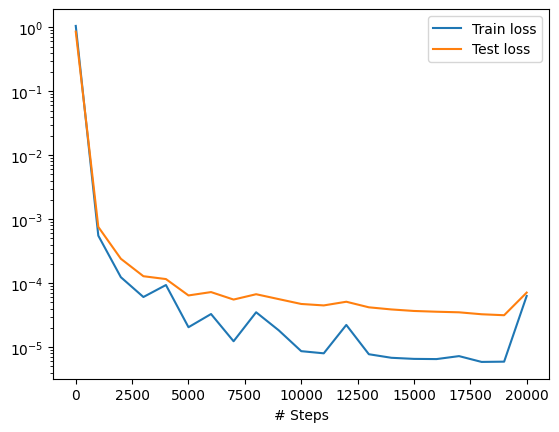

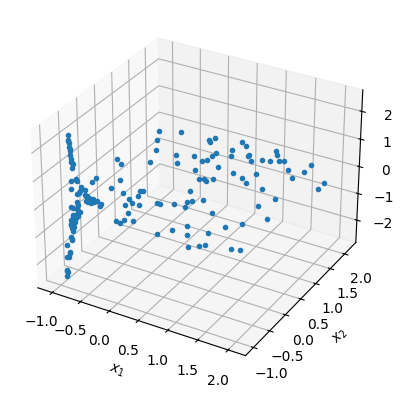

0       0.014598
1       0.014598
2       0.014598
3       0.014598
4       0.014598
          ...   
3996    0.001037
3997    0.001158
3998    0.001352
3999    0.001268
4000    0.002116
Name: x, Length: 4001, dtype: float64
[[0.014112  ]
 [0.01610713]
 [0.01810226]
 ...
 [0.0049515 ]
 [0.00508507]
 [0.00575253]]
[[0.014598   0.014112  ]
 [0.014598   0.01610713]
 [0.014598   0.01810226]
 ...
 [0.0013522  0.0049515 ]
 [0.00126786 0.00508507]
 [0.00211575 0.00575253]]
Mean Absolute Percentage Error: 23.37%
R² Score: 1.00


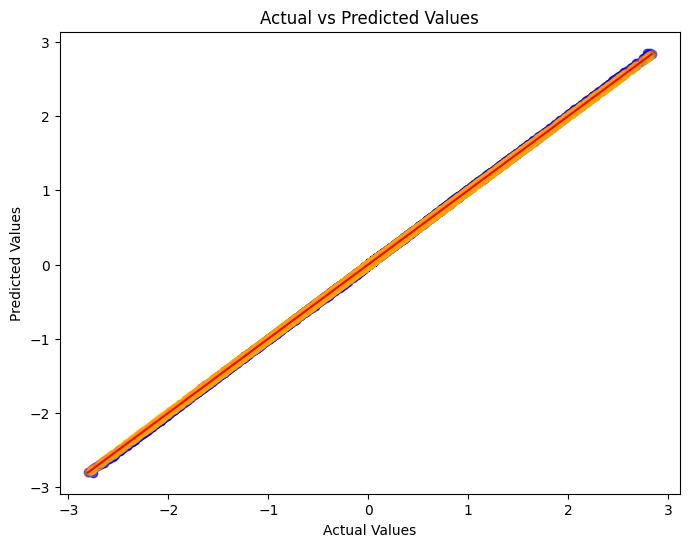

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import deepxde as dde
import tensorflow as tf


# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')  # Replace with your file path

# Sample n points randomly from the DataFrame
n = 400  # Specify how many points you want to sample
sampled_data = df.sample(n=n)

# Split the data into training (60%) and testing (40%)
train_data, test_data = train_test_split(sampled_data, test_size=0.4, random_state=42)

# Training data
x_train = np.array(train_data['x'].values).reshape(-1, 1)  # Extract the x values for training
y_train = np.array(train_data['y'].values).reshape(-1, 1)   # Extract the y values for training
sigma_train =np.array(train_data['sigma'].values).reshape(-1, 1)  # Extract the sigma values for training

# Testing data
x_test = np.array(test_data['x'].values).reshape(-1, 1)  # Extract the x values for testing
y_test = np.array(test_data['y'].values).reshape(-1, 1)  # Extract the y values for testing
sigma_test = np.array(test_data['sigma'].values).reshape(-1, 1) # Extract the sigma values for testing

print(x_train)
print(y_train)
print(sigma_train)
Com=np.stack((x_train,y_train))
com=Com.T
print(com)

from sklearn.preprocessing import StandardScaler

data_x=np.column_stack((x_train,y_train))
data_x=data_x
print(data_x.shape)

data_sigma=np.array(sigma_train)
test_x=np.column_stack((x_test,y_test))
test_x=test_x
print(test_x.shape)

test_sigma=np.array(sigma_test)

# Apply StandardScaler to the training and testing data
scaler_x = StandardScaler()
scaler_s = StandardScaler()

data_x = scaler_x.fit_transform(data_x)
data_sigma=scaler_s.fit_transform(data_sigma)
test_x = scaler_x.transform(test_x)
test_sigma=scaler_s.transform(test_sigma)

print(data_x)
print(data_sigma)
data = dde.data.dataset.DataSet(X_train=data_x, y_train=data_sigma, X_test=test_x, y_test=test_sigma)

# Define the network for σ
layer_size = [2] + [60] * 10 + [1]  # 2 inputs (x, y ) -> hidden layers -> 1 output (σ)
activation = "tanh"
initializer = "Glorot uniform"
net_sigma = dde.nn.FNN(layer_size, activation,initializer)

# Define the model
model_sigma = dde.Model(data, net_sigma)

# Compile the model with data
model_sigma.compile("adam", lr=1e-4)

# Train the model
losshistory, train_state = model_sigma.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score


X=df.iloc[:,1]
print(X)
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
print(Y)
Cor=np.column_stack([X,Y])
print(Cor)
Cor=scaler_x.transform(Cor)

# Assuming `model_sigma` is your trained model
# `X_test` is your test input data and `y_test` is the actual test output data

# Get predictions on test data
S_p = model_sigma.predict(Cor)
S_t=df.iloc[:,3]
#print(S_t)
S_t=np.array(S_t.tolist()).reshape(-1,1)
S_t=scaler_s.transform(S_t)
#print("First few actual values:", S_t[:5])
#print("First few predicted values:", S_p[:5])
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(S_t, S_p) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

# Calculate R² Score
r2 = r2_score(S_t, S_p)
print(f"R² Score: {r2:.2f}")

# Plot the actual vs predicted values for test data
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(S_t, S_p, alpha=0.7, color='blue', label='Predicted Values')
# Scatter plot for testing data (Actual Values)
plt.scatter(S_t, S_t, alpha=0.3, color='orange', label='Actual Values')
plt.plot([min(S_t), max(S_t)], [min(S_t), max(S_t)], color='red')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

0.03333333333333333
Compiling model...
Building feed-forward neural network...
'build' took 0.087060 s



c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 6.775673 s

Training model...

0         [1.71e-01, 4.00e+02]    [7.90e-02, 4.00e+02]    []  
1000      [9.19e-03, 1.54e+02]    [1.25e-02, 1.54e+02]    []  
2000      [7.27e-04, 1.07e+02]    [5.42e-04, 1.07e+02]    []  
3000      [5.41e-05, 8.50e+01]    [6.71e-05, 8.50e+01]    []  
4000      [1.51e-05, 7.01e+01]    [1.27e-05, 7.01e+01]    []  
5000      [2.99e-06, 5.83e+01]    [3.11e-06, 5.83e+01]    []  
6000      [7.68e-07, 4.85e+01]    [9.15e-07, 4.85e+01]    []  
7000      [2.32e-07, 4.01e+01]    [2.45e-07, 4.01e+01]    []  
8000      [8.23e-08, 3.27e+01]    [8.20e-08, 3.27e+01]    []  
9000      [2.67e-08, 2.62e+01]    [2.52e-08, 2.62e+01]    []  
10000     [9.08e-09, 2.05e+01]    [9.20e-09, 2.05e+01]    []  
11000     [4.39e-09, 1.56e+01]    [3.19e-09, 1.56e+01]    []  
12000     [1.45e-09, 1.15e+01]    [1.48e-09, 1.15e+01]    []  
13000     [7.21e-10, 8.05e+00]    [5.15e-10, 8.05e+00]    []  
14000     [2.16e-10, 5.32e+00]    [2.77e-10, 5.32e+00]    []  
15000    

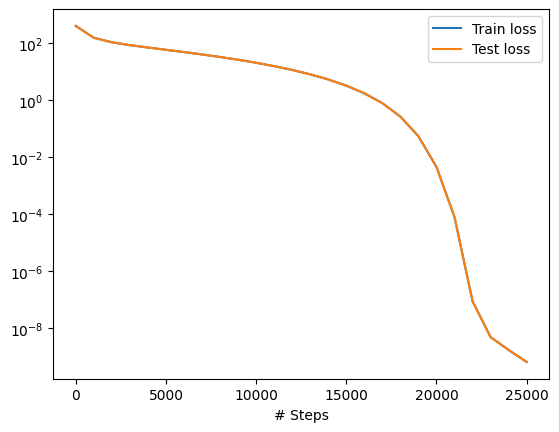

In [4]:
import tensorflow as tf

R = 4e-3/12e-2
print(R)
L= 1 #12e-2
t_last= 1 #4.2e5
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')
X=df.iloc[:,1]
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
Cor=np.column_stack([X,Y])
scaler_Cor = StandardScaler()
Cor=scaler_Cor.fit_transform(Cor)

square = dde.geometry.Rectangle([-L, -L], [L, L])

circle = dde.geometry.Disk([0, 0], R)

# Geometry and time domain
geom = dde.geometry.csg.CSGDifference(square, circle)
timedomain = dde.geometry.TimeDomain(0, t_last)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Create the initial and boundary conditions
ic = dde.icbc.IC(geomtime, lambda x: 20, lambda _, on_initial: on_initial)

def pde_C_L(x, C_L):
    num_pairs = 10
    num_samples = 1000
    last_time_idx = tf.shape(C_L)[1] - 1
    C_last_time_step = C_L[:, last_time_idx]    
    for _ in range(num_pairs):
        # Randomly select indices for C at the last time step
        idx1 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        idx2 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        
        # Retrieve the (x, y) coordinates using tf.gather
        coords_A = tf.gather(Cor, idx1)
        coords_B = tf.gather(Cor, idx2)

        coords_A = coords_A.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_A)
        coords_B = coords_B.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_B) 
        # Predict sigma (hydrostatic stress) for the selected coordinates
        sigma_A = model_sigma.predict([coords_A])
        sigma_B = model_sigma.predict([coords_B])
        
        # Compute the exponent for the constraint equation
        VH, R, T = 2e-6, 8.314, 298  # Modify constants as needed
        exponent = (VH / (R * T)) * (sigma_A - sigma_B)
        
        # Assuming idx1 and idx2 are indices generated by TensorFlow operations
        C_A = tf.gather(C_last_time_step, idx1)
        C_B = tf.gather(C_last_time_step, idx2)
        eq1=(C_A - C_B * tf.exp(exponent))

    dC_L_dt = dde.grad.jacobian(C_L, x, i=0, j=2)
    dC_L_dx2 = dde.grad.hessian(C_L, x, i=0, j=0)
    dC_L_dy2 = dde.grad.hessian(C_L, x, i=0, j=1)
    eq = dC_L_dt - (3.8) * (dC_L_dx2 + dC_L_dy2)-eq1
    return eq

data = dde.data.TimePDE(
    geomtime,
    pde_C_L,[ic],
    num_domain=1000,
    #num_boundary=150,
    num_initial=1000,
    num_test=1000,
    )

# Network for C_L
layer_size = [3] + [64] * 10 + [1]  
activation = "tanh"
initializer = "Glorot uniform"
net_C_L = dde.nn.FNN(layer_size, activation, initializer)
num_time_steps = 5
num_features=3

model= dde.Model(data, net_C_L)

model.compile("adam", lr=1e-5)
# Define the model with the PDE, initial and boundary conditions

# Add the callback when training the model
losshistory, train_state = model.train(epochs=25000, display_every=1000)

# Optionally plot and save results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [5]:
import numpy as np

# Assume `sigma_model` is your pre-trained model that accepts (x, y) as input and predicts sigma
h = 1e-5  # Small step for finite difference

# Example data points (x, y) to compute gradients at
data_points = np.array([
    [0.2, 0.5],  # Point 1: (x=0.2, y=0.5)
    [0.4, 0.7],  # Point 2: (x=0.4, y=0.7)
    [0.1, 0.3],  # Point 3: (x=0.1, y=0.3)
])

# Initialize arrays for storing gradients
grad_sigma_x = np.zeros(data_points.shape[0])
grad_sigma_y = np.zeros(data_points.shape[0])

# Loop through each data point to calculate the gradient
for i, (x, y) in enumerate(data_points):
    # Compute sigma at the original point
    sigma_0 = model_sigma.predict(np.array([[x, y]]))  # Sigma at (x, y)
    
    # Finite difference approximation for the gradient with respect to x
    sigma_x_plus_h = model_sigma.predict(np.array([[x + h, y]]))  # Sigma at (x + h, y)
    sigma_x_minus_h = model_sigma.predict(np.array([[x - h, y]]))  # Sigma at (x - h, y)
    grad_sigma_x[i] = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)
    
    # Finite difference approximation for the gradient with respect to y
    sigma_y_plus_h =model_sigma.predict(np.array([[x, y + h]]))  # Sigma at (x, y + h)
    sigma_y_minus_h = model_sigma.predict(np.array([[x, y - h]]))  # Sigma at (x, y - h)
    grad_sigma_y[i] = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)

# Print the gradients
print("Gradient of sigma with respect to x:\n", grad_sigma_x)
print(grad_sigma_y.shape)
print("Gradient of sigma with respect to y:\n", grad_sigma_y)


Gradient of sigma with respect to x:
 [0.04135072 0.01229346 0.06482005]
(3,)
Gradient of sigma with respect to y:
 [ 0.00223517  0.01601875 -0.00447035]


C:\Users\yesda\AppData\Local\Temp\ipykernel_9700\3559021455.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad_sigma_x[i] = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)
C:\Users\yesda\AppData\Local\Temp\ipykernel_9700\3559021455.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad_sigma_y[i] = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)


In [34]:
import numpy as np

# Initialize two empty lists to store the gradients with respect to x and y
grad_sigma_x = []
grad_sigma_y = []

# Loop through each data point to calculate the gradient
for i, (x, y) in enumerate(data_points):
    # Compute sigma at the original point
    sigma_0 = model_sigma.predict(np.array([[x, y]]))  # Sigma at (x, y)
    
    # Finite difference approximation for the gradient with respect to x
    sigma_x_plus_h = model_sigma.predict(np.array([[x + h, y]]))  # Sigma at (x + h, y)
    sigma_x_minus_h = model_sigma.predict(np.array([[x - h, y]]))  # Sigma at (x - h, y)
    grad_x = (sigma_x_plus_h - sigma_x_minus_h) / (2 * h)  # Gradient w.r.t. x

    # Finite difference approximation for the gradient with respect to y
    sigma_y_plus_h = model_sigma.predict(np.array([[x, y + h]]))  # Sigma at (x, y + h)
    sigma_y_minus_h = model_sigma.predict(np.array([[x, y - h]]))  # Sigma at (x, y - h)
    grad_y = (sigma_y_plus_h - sigma_y_minus_h) / (2 * h)  # Gradient w.r.t. y

    # Append the calculated gradients to the respective lists
    grad_sigma_x.append(grad_x[0][0])  # Extract the scalar value and append to list
    grad_sigma_y.append(grad_y[0][0])  # Extract the scalar value and append to list

# Convert lists to numpy arrays (optional)
grad_sigma_x = np.array(grad_sigma_x)
grad_sigma_y = np.array(grad_sigma_y)

# After the loop, grad_sigma_x and grad_sigma_y contain the gradients for each point
print("Gradients with respect to x:", grad_sigma_x.shape)
print("Gradients with respect to y:", grad_sigma_y.shape)
grad_sigma_data= tf.stack([grad_sigma_x, grad_sigma_y], axis=-1)
print(grad_sigma_data.shape)
# Also assuming you have a list of corresponding (x, y) points
known_x_points = tf.constant(Cor[:, 0], dtype=tf.float32)  # Known x-points
known_y_points = tf.constant(Cor[:, 1], dtype=tf.float32)  # Known y-points

Gradients with respect to x: (4001,)
Gradients with respect to y: (4001,)
(4001, 2)


Compiling model...
Building feed-forward neural network...
'build' took 0.088915 s



c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 45.469261 s

Training model...

0         [4.67e-01, 4.00e+02]    [3.31e-01, 4.00e+02]    []  
1000      [4.03e-02, 1.41e+02]    [3.27e-02, 1.41e+02]    []  
2000      [2.51e-03, 9.69e+01]    [2.46e-03, 9.69e+01]    []  
3000      [3.74e-04, 7.71e+01]    [3.92e-04, 7.71e+01]    []  
4000      [7.55e-05, 6.36e+01]    [8.80e-05, 6.36e+01]    []  
5000      [1.86e-05, 5.28e+01]    [2.42e-05, 5.28e+01]    []  

Best model at step 5000:
  train loss: 5.28e+01
  test loss: 5.28e+01
  test metric: []

'train' took 477.099107 s

Saving loss history to c:\Users\yesda\Documents\GitHub\PINN_testing\loss.dat ...
Saving training data to c:\Users\yesda\Documents\GitHub\PINN_testing\train.dat ...
Saving test data to c:\Users\yesda\Documents\GitHub\PINN_testing\test.dat ...


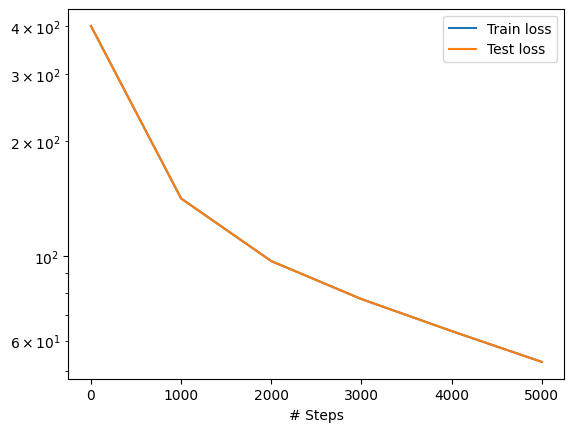

In [35]:
import tensorflow as tf
h = 1e-5 
R = 4e-3/12e-2
L= 1 #12e-2
t_last= 1 #4.2e5
square = dde.geometry.Rectangle([-L, -L], [L, L])
circle = dde.geometry.Disk([0, 0], R)

geom = dde.geometry.csg.CSGDifference(square, circle)
timedomain = dde.geometry.TimeDomain(0, t_last)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

ic = dde.icbc.IC(geomtime, lambda x: 20, lambda _, on_initial: on_initial)


df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')
X=df.iloc[:,1]
X=np.array(X.tolist()).reshape(-1,1)
Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
Cor=np.column_stack([X,Y])
scaler_Cor = StandardScaler()
Cor=scaler_Cor.fit_transform(Cor)
data_points=Cor


# Interpolation function using TensorFlow operations
def interpolate_gradients(xx, yy, known_x, known_y, grad_sigma_x,grad_sigma_y):
    # Find the closest points in the grid and interpolate using TensorFlow operations
    # This is an example using tf.gather, assuming the data is sorted by grid points
    # In practice, you might want to use bilinear interpolation or another method
    grad_sigma_x2 = tf.gather(grad_sigma_x, tf.argmin(tf.abs(xx - known_x), axis=0))
    grad_sigma_y2 = tf.gather(grad_sigma_y, tf.argmin(tf.abs(yy - known_y), axis=0))
    return grad_sigma_x2, grad_sigma_y2

def pde_C_L(x, C_L):
    num_pairs = 10
    num_samples = 1000
    last_time_idx = tf.shape(C_L)[1] - 1
    C_last_time_step = C_L[:, last_time_idx]    
    for _ in range(num_pairs):
        # Randomly select indices for C at the last time step
        idx1 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        idx2 = tf.random.uniform([], minval=0, maxval=num_samples, dtype=tf.int32)
        
        # Retrieve the (x, y) coordinates using tf.gather
        coords_A = tf.gather(Cor, idx1)
        coords_B = tf.gather(Cor, idx2)

        coords_A = coords_A.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_A)
        coords_B = coords_B.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(coords_B) 
        # Predict sigma (hydrostatic stress) for the selected coordinates
        sigma_A = model_sigma.predict([coords_A])
        sigma_B = model_sigma.predict([coords_B])
        
        # Compute the exponent for the constraint equation
        VH, R, T = 2e-6, 8.314, 298  # Modify constants as needed
        exponent = (VH / (R * T)) * (sigma_A - sigma_B)
        
        # Assuming idx1 and idx2 are indices generated by TensorFlow operations
        C_A = tf.gather(C_last_time_step, idx1)
        C_B = tf.gather(C_last_time_step, idx2)
        eq1=(C_A - C_B * tf.exp(exponent))


    # Gradients (partial derivatives)
    dC_L_dt = dde.grad.jacobian(C_L, x, i=0, j=2)  # ∂C_L/∂t (time derivative)
    grad_C_L_x = dde.grad.jacobian(C_L, x, i=0, j=0)  # ∂C_L/∂x
    grad_C_L_y = dde.grad.jacobian(C_L, x, i=0, j=1)  # ∂C_L/∂y
    # Parameters D_L = 1, V_H = 1, RT = 1 are given
    D_L = 3.8
    V_H = 2e-6
    RT=8.314*298

    x_value = x[:, 0:1]
    y_value = x[:, 1:2]

    # Retrieve the gradients using interpolation (or any other lookup mechanism)
    grad_sigma_x2, grad_sigma_y2 = interpolate_gradients(x_value, y_value, known_x_points, known_y_points, grad_sigma_x,grad_sigma_y)
    grad_sigma_x2 = tf.cast(grad_sigma_x2, dtype=tf.float32)
    grad_sigma_y2 = tf.cast(grad_sigma_y2, dtype=tf.float32)

    div_DL_grad_CL = dde.grad.jacobian(D_L * grad_C_L_x, x, j=0) + dde.grad.jacobian(D_L * grad_C_L_y, x, j=1)
    div_DL_CL_VH_grad_sigma_H = (
        dde.grad.jacobian(D_L * C_L * V_H / RT *grad_sigma_x2 , x,i=0, j=0) +
        dde.grad.jacobian(D_L * C_L * V_H / RT *grad_sigma_y2, x, i=0, j=1)
    )

    # PDE equation
    eq2 = dC_L_dt - div_DL_grad_CL + div_DL_CL_VH_grad_sigma_H
    eq = eq2-eq1
    return eq

data = dde.data.TimePDE(
    geomtime,
    pde_C_L,[ic],
    num_domain=1000,
    num_boundary=1000,
    num_initial=1000,
    num_test=1000,
    )

# Network for C_L
layer_size = [3] + [64] * 10 + [1]  
activation = "tanh"
initializer = "Glorot uniform"
net_C_L = dde.nn.FNN(layer_size, activation, initializer)
num_time_steps = 5
num_features=3

model= dde.Model(data, net_C_L)

model.compile("adam", lr=1e-5)
# Define the model with the PDE, initial and boundary conditions

# Add the callback when training the model
losshistory, train_state = model.train(epochs=5000, display_every=1000)

# Optionally plot and save results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [36]:
import pandas as pd

# Load the coordinates file (Excel or CSV)
# For Excel:
coordinates_df = pd.read_excel('Hydrostatic Data with Nodes.xlsx') 

# Display the first few rows to verify the data
print(coordinates_df.head())

# Assuming the file has columns named 'x' and 'y'
x_coords = np.array(coordinates_df['x'].values).reshape(-1,1)
y_coords = np.array(coordinates_df['y'].values).reshape(-1,1)

# Verify the extracted coordinates
print("X coordinates:", x_coords)
print("Y coordinates:", y_coords)

scaler_1=StandardScaler()
x_coords=scaler_1.fit_transform(x_coords)
scaler_2=StandardScaler()
y_coords=scaler_2.fit_transform(y_coords)

# Load Excel data (or CSV for demonstration purposes)
df = pd.read_excel('hydrogen_concentration.xlsx') 
time = df['time'].values
time=np.array(time.tolist())/1000000
print(time)
x_coords = np.ravel(np.array(x_coords).reshape([1,-1]))
print(x_coords.shape)
y_coords = np.ravel(np.array(y_coords).reshape([1,-1]))
print(y_coords.shape)
time_steps = np.ravel(np.array(time).reshape([1,-1]))  # Example time steps
print(time_steps.shape)

predictions = np.zeros((len(x_coords), len(y_coords), len(time_steps)))

# Loop through each time step
for t_idx, t in enumerate(time_steps):
    # Loop through all (x, y) combinations
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        input_data = np.array([x, y,t]) 
        #print(f"Predicting for x={x}, y={y}, t={t} (normalized: {test_time})")
        # Make the prediction for this (x, y, t) combination
        prediction = model.predict([input_data])[0][0]
        print(f"Prediction for (x={x}, y={y}, t={t}): {prediction}")
        # Extract the scalar prediction value (ensure it's not a sequence)
        
        predictions[:,i,t_idx]=prediction
        # Store the prediction in the correct location
predictions=np.array(predictions[0]).T        
print(predictions)  


     node         x         y       sigma
0  node_1  0.014598  0.014112  43584350.6
1  node_2  0.014598  0.016107  43195861.8
2  node_3  0.014598  0.018102  42957984.9
3  node_4  0.014598  0.020097  42829105.4
4  node_5  0.014598  0.022093  42774711.6
X coordinates: [[0.014598  ]
 [0.014598  ]
 [0.014598  ]
 ...
 [0.0013522 ]
 [0.00126786]
 [0.00211575]]
Y coordinates: [[0.014112  ]
 [0.01610713]
 [0.01810226]
 ...
 [0.0049515 ]
 [0.00508507]
 [0.00575253]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
(4001,)
(4001,)
(101,)
P

KeyboardInterrupt: 

In [ ]:
import os
def delete_file(filepath):
    # Check if the file exists
    if os.path.exists(filepath):
        try:
            # Delete the file
            os.remove(filepath)
            print(f"File {filepath} successfully deleted.")
        except Exception as e:
            print(f"Error deleting file {filepath}: {e}")
    else:
        print(f"File {filepath} does not exist.")
filepath = "predictions_output.xlsx"

# Delete the file
delete_file(filepath)

print(predictions)
# Flatten the x_coords and y_coords arrays for labeling the columns
x_coords_flat = np.ravel(x_coords)
y_coords_flat = np.ravel(y_coords)

# Prepare column labels as "(x, y)" pairs
column_labels = [f"node_{i+1}" for i in range(len(x_coords_flat))]

# Prepare data for Excel: each row corresponds to a time step, each column to an (x, y) node

# Create a Pandas DataFrame with time steps as rows and (x, y) as columns
df = pd.DataFrame(predictions, columns=column_labels)

# Add a "Time" column to label the time steps
df.insert(0,"time", (time_steps.flatten())*1000000)

# Export the DataFrame to an Excel file
df.to_excel("predictions_output.xlsx", index=False)

print("Data has been successfully exported to predictions_output.xlsx")


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the two Excel files, skipping the first row and first column
df1 = pd.read_excel('hydrogen_concentration.xlsx').iloc[2:, 1:]
df2 = pd.read_excel('predictions_output.xlsx').iloc[2:, 1:]

# Ensure the data is aligned by resetting the indices
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# Convert the dataframes to NumPy arrays for easy comparison
data1 = df1.to_numpy()
data2 = df2.to_numpy()

# Calculate similarity metrics
mse = mean_squared_error(data1, data2)
mae = mean_absolute_error(data1, data2)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Optionally, compute element-wise absolute differences
difference = abs(data1 - data2)
print(f"Max Absolute Difference: {difference.max()}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df3 = pd.read_excel('hydrogen_concentration.xlsx')  # First dataset
df4 = pd.read_excel('predictions_output.xlsx')  # Second dataset



# Heatmap for Dataset 1
plt.figure(figsize=(12, 8))
sns.heatmap(df3.set_index('time').T, cmap="YlGnBu", cbar_kws={'label': 'Value'})
plt.title("Heatmap of Dataset 1 (Values per Node over Time)")
plt.xlabel("Time")
plt.ylabel("Nodes")
plt.show()

# Heatmap for Dataset 2
plt.figure(figsize=(12, 8))
sns.heatmap(df4.set_index('time').T, cmap="YlGnBu", cbar_kws={'label': 'Value'})
plt.title("Heatmap of Dataset 2 (Values per Node over Time)")
plt.xlabel("Time")
plt.ylabel("Nodes")
plt.show()

df_diff = df3.set_index('time') - df4.set_index('time')
# Heatmap for the Difference
plt.figure(figsize=(12, 8))
sns.heatmap(df_diff.T, cmap="coolwarm", cbar_kws={'label': 'Difference'})
plt.title("Heatmap of Difference (Dataset 1 - Dataset 2)")
plt.xlabel("Time")
plt.ylabel("Nodes")
plt.show()



In [11]:
# Test some points in the domain (x, y, t)
X_test = np.array([[0.01, 0.01, 1]])  # Example test input
y_pred = model.predict(X_test)
print(f"Prediction at (0.1, 0.1, 1): {y_pred}")


Prediction at (0.1, 0.1, 1): [[19.999968]]
